In [1]:
import anndata
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

from mcDETECT.utils import *
from mcDETECT.model import *

import warnings
warnings.filterwarnings("ignore")
sc.settings.verbosity = 0

/Users/chenyang/miniconda3/envs/mcDETECT-env/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/Users/chenyang/miniconda3/envs/mcDETECT-env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/chenyang/miniconda3/envs/mcDETECT-env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/chenyang/miniconda3/envs/mcDETECT-env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read

In [2]:
# File paths
dataset = "MERSCOPE_WT_1"
data_path = f"../data/{dataset}/"
output_path = f"../output/{dataset}/"

In [3]:
# Colors
color_dct = ["#F56867","#FEB915","#C798EE","#59BE86","#7495D3","#6D1A9C","#15821E","#3A84E6","#997273","#787878","#DB4C6C","#9E7A7A","#554236","#AF5F3C","#93796C","#F9BD3F","#DAB370","#877F6C","#268785"]
color_cts = clr.LinearSegmentedColormap.from_list("magma", ["#000003", "#3B0F6F", "#8C2980", "#F66E5B", "#FD9F6C", "#FBFCBF"], N=256)

In [4]:
# -------------------- Read data -------------------- #

# Cells
adata = sc.read_h5ad(data_path + "processed_data/adata.h5ad")

# Neurons
adata_neuron = adata[adata.obs["cell_type"].isin(["Glutamatergic", "GABAergic"])].copy()

# Transcripts
transcripts = pd.read_parquet(data_path + "processed_data/transcripts.parquet")

# Genes
genes = pd.read_csv(data_path + "processed_data/genes.csv")
genes = list(genes.iloc[:, 0])

# Negative control markers
nc_genes = pd.read_csv(data_path + "processed_data/negative_controls.csv")
nc_genes = list(nc_genes["Gene"])

# Spots
spots = sc.read_h5ad(data_path + "processed_data/spots.h5ad")

In [5]:
sc.set_figure_params(scanpy = True, figsize = (6, 9))
ax = sc.pl.scatter(adata, alpha = 1, x = "global_y_new", y = "global_x_new", color = "cell_type", palette = color_dct, size = 5, title = " ", show = False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig(output_path + "cell_type.png", dpi = 300, bbox_inches = "tight")
plt.close()

In [6]:
# Markers
syn_genes = ["Camk2a", "Cplx2", "Slc17a7", "Ddn", "Syp", "Map1a", "Shank1", "Syn1", "Gria1", "Gria2", "Cyfip2", "Vamp2", "Bsn", "Slc32a1", "Nfasc", "Syt1", "Tubb3", "Nav1", "Shank3", "Mapt"]
len(syn_genes)

20

In [7]:
# Initialize mcDETECT
# no size filtering (size_thr = 1e5), no in-soma filtering (in_soma_thr = (1.01, 0.01)), no negative control filtering (nc_genes = None)
mc = mcDETECT(type = "MERSCOPE", transcripts = transcripts, gnl_genes = syn_genes, nc_genes = None, eps = 1.5,
              minspl = 3, grid_len = 1, cutoff_prob = 0.95, alpha = 10, low_bound = 3, size_thr = 1e5,
              in_soma_thr = (1.01, 0.01), l = 1, rho = 0.1, s = 1, nc_top = 15, nc_thr = 0.1)

In [ ]:
# Detection
_, data_low, _ = mc.dbscan(record_cell_id = True)
print("Merging spheres...")
granules = mc.merge_sphere(data_low)
granules.to_parquet(output_path + "all_granules.parquet")        

1 out of 20 genes processed!
2 out of 20 genes processed!
3 out of 20 genes processed!
4 out of 20 genes processed!
5 out of 20 genes processed!
6 out of 20 genes processed!
7 out of 20 genes processed!
8 out of 20 genes processed!
9 out of 20 genes processed!
10 out of 20 genes processed!
11 out of 20 genes processed!
12 out of 20 genes processed!
13 out of 20 genes processed!
14 out of 20 genes processed!
15 out of 20 genes processed!
16 out of 20 genes processed!
17 out of 20 genes processed!
18 out of 20 genes processed!
19 out of 20 genes processed!
20 out of 20 genes processed!


(array([7.32898e+05, 7.09000e+02, 1.46800e+03, 2.06500e+03, 2.28200e+03,
        4.22500e+03, 3.84800e+03, 5.47900e+03, 7.43000e+03, 1.54900e+03,
        1.10920e+04, 2.88300e+03, 1.64230e+04, 1.83600e+03, 4.78000e+03,
        2.50300e+03, 2.33160e+04, 1.04000e+03, 4.21300e+03, 1.00600e+03,
        1.13480e+04, 4.96000e+03, 3.32700e+03, 1.44800e+03, 3.41000e+02,
        2.41940e+04, 1.52500e+03, 3.24200e+03, 5.10100e+03, 1.22200e+03,
        1.18570e+04, 4.22400e+03, 1.10000e+03, 2.61650e+04, 2.60800e+03,
        5.22400e+03, 1.85200e+03, 1.90410e+04, 3.20000e+03, 9.07000e+02,
        1.43030e+04, 8.75700e+03, 6.44200e+03, 4.19000e+03, 3.02300e+03,
        3.79800e+03, 1.93200e+03, 1.08900e+03, 3.94000e+02, 1.46557e+05]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.

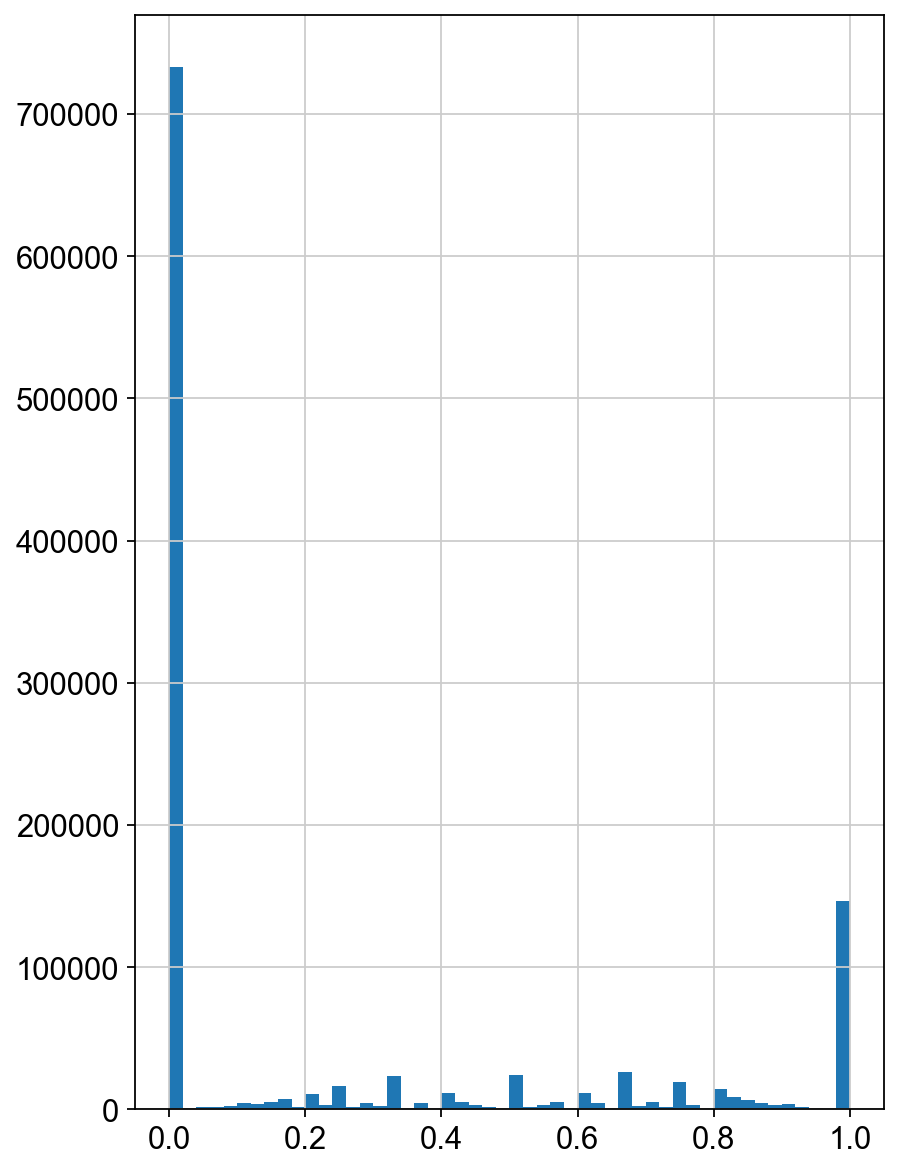

In [16]:
tmp = granules[granules["in_soma_ratio"] < 0.2].copy()
np.sum(tmp["in_soma_ratio"] == 0) / len(tmp)
plt.hist(granules["in_soma_ratio"], bins = 50)

In [ ]:
cutoff = np.quantile(granules["sphere_r"], 0.999)
plt.hist([i for i in granules["sphere_r"] if i < cutoff], bins = 50)

In [ ]:
# Assign region labels
labels_df = pd.DataFrame({"global_x": spots.obs["global_x"], "global_y": spots.obs["global_y"], "brain_area": spots.obs["brain_area"]})
x_grid, y_grid = list(np.unique(labels_df["global_x"])), list(np.unique(labels_df["global_y"]))

granules["brain_area"] = np.nan
for i in range(granules.shape[0]):
    closest_x = closest(x_grid, granules["sphere_x"].iloc[i])
    closest_y = closest(y_grid, granules["sphere_y"].iloc[i])
    target_label = labels_df[(labels_df["global_x"] == closest_x) & (labels_df["global_y"] == closest_y)]
    granules["brain_area"].iloc[i] = target_label["brain_area"][0]

theta = 10 * np.pi / 180
rotation_matrix = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
coords = granules[["sphere_y", "sphere_x"]].to_numpy()
transformed_coords = coords @ rotation_matrix.T
granules["global_y_new"] = transformed_coords[:, 0]
granules["global_x_new"] = transformed_coords[:, 1]

cutoff = 6250
granules["global_y_new"] = cutoff - granules["global_y_new"]

granules.head()

In [ ]:
# Save granules
granules.to_csv("output/all_granules.csv", index = 0)

In [ ]:
# Read granules
granules = pd.read_csv("output/all_granules.csv")

In [ ]:
# Spot-level neuron and granule metadata
spot_neuron_all = spot_neuron(adata_neuron, spots)
spot_neuron_all.write_h5ad("../WT_AD_comparison/MERSCOPE_WT_1_neurons.h5ad")

spot_granule_all = spot_granule(granule = granules, spot = spots)
spot_granule_all.write_h5ad("../WT_AD_comparison/MERSCOPE_WT_1_granules.h5ad")

In [ ]:
sc.set_figure_params(scanpy = True, figsize = (6, 9))
ax = sc.pl.scatter(spot_granule_all, alpha = 1, x = "global_y_new", y = "global_x_new", color = "brain_area", palette = color_dct, size = 40, title = " ", show = False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
frame_width = 1.5
for spine in ax.spines.values():
    spine.set_linewidth(frame_width)
plt.show()

In [ ]:
granule_array = np.array(spot_granule_all.obs["gnl_count"])
neuron_array = np.array(spot_neuron_all.obs["neuron_count"])
area_array = np.array(spot_granule_all.obs["brain_area"])

granule_density, neuron_density = [], []

area_list = ["Isocortex", "OLF", "HPF-CA", "HPF-DG", "HPF-SR", "CTXsp", "TH", "MB", "FT"]
for j in area_list:
    granule_temp = granule_array[area_array == j]
    neuron_temp = neuron_array[area_array == j]
    granule_density.append(np.sum(granule_temp) / len(granule_temp))
    neuron_density.append(np.sum(neuron_temp) / len(neuron_temp))

density_comparison = pd.DataFrame({"area_list": area_list, "granule_density": granule_density, "neuron_density": neuron_density})
density_comparison.to_csv("../WT_AD_comparison/MERSCOPE_WT_1_granule_neuron_density.csv", index = 0)

In [ ]:
# Plot granules
granule_adata = anndata.AnnData(X = np.zeros(granules.shape), obs = granules)
granule_adata.obs["brain_area"] = pd.Categorical(granule_adata.obs["brain_area"], categories = ["CTXsp", "FT", "HPF-CA", "HPF-DG", "HPF-SR", "Isocortex", "MB", "OLF", "TH"], ordered = True)

# cutoff = 6250
# granule_adata.obs["global_y_new"] = cutoff - granule_adata.obs["global_y_new"]

sc.set_figure_params(scanpy = True, figsize = (6, 9))
ax = sc.pl.scatter(granule_adata, alpha = 1, x = "global_y_new", y = "global_x_new", color = "brain_area", palette = color_dct, size = 1, title = " ", show = False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig("output/all_granules.png", dpi = 300, bbox_inches = "tight")
plt.close()

In [ ]:
# # Plot granules (downsampled)
# n = int(granule_adata.shape[0] / 20)
# np.random.seed(42)
# idx = np.random.choice(granule_adata.shape[0], n, replace=False)
# granule_subset = granule_adata[idx, :]

# ax = sc.pl.scatter(granule_subset, alpha=1, x = "global_y_new", y = "global_x_new", color="brain_area", palette=color_dct, size=20, title=" ", show=False)
# ax.grid(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xlabel("")
# ax.set_ylabel("")
# for spine in ax.spines.values():
#     spine.set_visible(False)
# for coll in ax.collections:
#     coll.set_edgecolor("black")
#     coll.set_linewidth(0.1)
# plt.savefig(f"output/all_granules_downsample_{n}.jpeg", dpi=500, bbox_inches="tight")
# plt.close()

In [ ]:
# Granule expression profile
granule_adata = mc.profile(granules, genes = genes)
granule_adata

In [ ]:
# Normalization
sc.pp.normalize_total(granule_adata, target_sum=1e4)
sc.pp.log1p(granule_adata)

In [ ]:
# Granule vs neuron expression (nuclei)
np.random.seed(42)
permuted_indices = np.random.permutation(granule_adata.n_obs)
granule_adata_permutated = granule_adata[permuted_indices].copy()

In [ ]:
adata_all = anndata.concat([granule_adata_permutated, adata_neuron], axis = 0, merge = "same")
adata_all.var["genes"] = adata_all.var.index
adata_all.obs["type"] = ["Granules"] * granule_adata_permutated.shape[0] + ["Neurons"] * adata_neuron.shape[0]
adata_all.obs["type"] = pd.Categorical(adata_all.obs["type"], categories = ["Granules", "Neurons"], ordered = True)
adata_all

In [ ]:
sc.tl.rank_genes_groups(adata_all, "type", method="wilcoxon")
markers = pd.DataFrame(adata_all.uns["rank_genes_groups"]["names"])
markers.head(5)

In [ ]:
names = adata_all.uns["rank_genes_groups"]["names"]
names = pd.DataFrame(names)
logfc = adata_all.uns["rank_genes_groups"]["logfoldchanges"]
logfc = pd.DataFrame(logfc)
pvals = adata_all.uns["rank_genes_groups"]["pvals"]
pvals = pd.DataFrame(pvals)

markers = []

for i in ["Neurons"]:
    df = {"names": names[i], "logfc": logfc[i], "pvals": pvals[i]}
    df = pd.DataFrame(df)
    df = df[df["logfc"] >= 1.5]
    df = df[df["pvals"] <= 0.05]
    df = df.sort_values(by = ["logfc"], ascending = False)
    print(df["names"].head(15).tolist())

In [ ]:
gene_groups = {"Granule Markers": ["Camk2a", "Cplx2", "Slc17a7", "Syp", "Ddn", "Map1a", "Syn1", "Shank1", "Cyfip2", "Vamp2"],
               "Neuron Markers": ["Trpc4", "Gjc3", "Plekhb1", "Ntrk2", "Ntsr2", "Fn1", "Gnai2", "Shc3", "Reep3", "Chd9", "Acsbg1"]}
target_genes = [gene for group in gene_groups.values() for gene in group]

var_group_positions = [(0, 10), (10, 20)]
var_group_labels = list(gene_groups.keys())

sc.set_figure_params(scanpy=True, fontsize=10)
fig = sc.pl.heatmap(adata_all, target_genes, groupby = "type", log = True, cmap = "Reds", standard_scale = "var", swap_axes = True, figsize = (10, 4), show = False)
plt.savefig("output/granule_neuron_heatmap.jpeg", dpi = 300, bbox_inches = "tight")
plt.close()

In [ ]:
print([i for i in df["names"].head(20).tolist() if i not in syn_genes])